# cartpole CV로 받기

In [2]:
#!pip install gymnasium
#!pip install opencv-python
!pip install stable-baselines3[extra]

  Using cached stable_baselines3-2.3.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached torch-2.4.0-cp38-cp38-win_amd64.whl.metadata (27 kB)
  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
  Using cached tensorboard-2.14.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached Shimmy-1.3.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached AutoROM-0.6.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached AutoROM.accept_rom_license-0.6.1-py3-none-any.whl
  Using cached ale_py-0.8.1-cp38-cp38-win_amd64.whl.metadata (8.3 kB)
  Using cached grpcio-1.65.1-cp38-cp38-win_amd64.whl.metadata (3.4 kB)
  Using cached google_auth-2.32.0-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached Markdown-3.6-py3-none-any.whl

In [1]:
import gymnasium as gym
import cv2
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import BaseCallback

ModuleNotFoundError: No module named 'cv2'

2. CartPole 환경 생성 및 OpenCV를 통한 실시간 화면 출력

In [8]:
env = gym.make('CartPole-v1',render_mode='human')

class RenderCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RenderCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        frame = self.training_env.render()
        cv2.imshow('CartPole', frame)
        cv2.waitKey(1)
        return True

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    result = env.step(action)
    
    if len(result) == 4:
        obs, reward, done, info = result
    elif len(result) == 5:
        obs, reward, done, truncated, info = result
        done = done or truncated
    else:
        raise ValueError("Unexpected number of values returned from env.step()")

    frame = env.render()
    cv2.imshow('CartPole', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
env.close()



error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [15]:
# 반혼 개수 수정 코드

env = gym.make('CartPole-v1', render_mode='rgb_array')

class RenderCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RenderCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        frame = self.training_env.render()
        if frame is not None and frame.size > 0:
            cv2.imshow('CartPole', frame)
            cv2.waitKey(1)
        return True

obs, info = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    result = env.step(action)
    
    if len(result) == 4:
        obs, reward, done, info = result
    elif len(result) == 5:
        obs, reward, done, truncated, info = result
        done = done or truncated
    else:
        raise ValueError("Unexpected number of values returned from env.step()")

    frame = env.render()
    if frame is not None and frame.size > 0:
        cv2.imshow('CartPole', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()
env.close()


In [3]:
# PPO 모델 학습 및 평가
env = make_vec_env('CartPole-v1', n_envs=1)

model = PPO('MlpPolicy', env, verbose=1)
callback = RenderCallback()

model.learn(total_timesteps=10000, callback=callback)

obs = env.reset()

for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    frame = env.render(mode='rgb_array')
    cv2.imshow('CartPole', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
env.close()


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | 22.4     |
| time/              |          |
|    fps             | 253      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------


KeyboardInterrupt: 

# cartpole 비교 시각화 코드

Training PPO...
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | 21.4     |
| time/              |          |
|    fps             | 159      |
|    iterations      | 1        |
|    time_elapsed    | 12       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.7        |
|    ep_rew_mean          | 27.7        |
| time/                   |             |
|    fps                  | 159         |
|    iterations           | 2           |
|    time_elapsed         | 25          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010881359 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.00288   

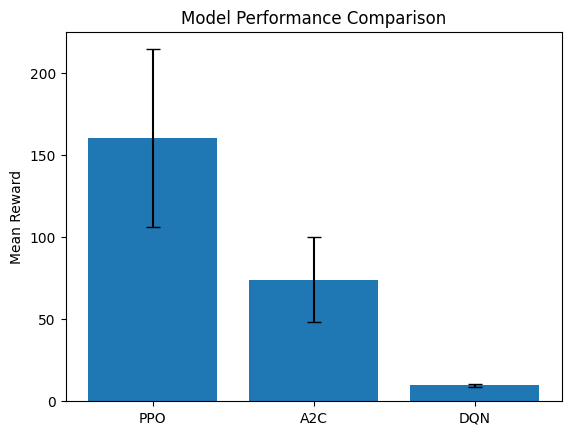

: 

In [1]:
import gym
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from stable_baselines3 import PPO, A2C, DQN
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env

# RenderCallback 클래스 정의
class RenderCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(RenderCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        frame = self.training_env.render()
        if frame is not None and frame.size > 0:
            cv2.imshow('CartPole', frame)
            cv2.waitKey(1)
        return True

# 모델 학습 함수 정의
def train_model(model_class, model_name, env, total_timesteps=10000):
    model = model_class('MlpPolicy', env, verbose=1)
    callback = RenderCallback()
    model.learn(total_timesteps=total_timesteps, callback=callback)
    return model

# 성능 평가 함수 정의
def evaluate_model(model, env, num_episodes=10):
    episode_rewards = []
    for _ in range(num_episodes):
        obs = env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _states = model.predict(obs)
            obs, reward, done, info = env.step(action)
            total_reward += reward
        episode_rewards.append(total_reward)
    return np.mean(episode_rewards), np.std(episode_rewards)

# 환경 설정
env_id = 'CartPole-v1'
total_timesteps = 10000
num_episodes = 10

# 모델 리스트
models = [
    (PPO, 'PPO'),
    (A2C, 'A2C'),
    (DQN, 'DQN')
]

# 성능 비교를 위한 로그 데이터 초기화
log_data = {
    "model_name": [],
    "mean_reward": [],
    "std_reward": []
}

# 각 모델 학습 및 평가
for model_class, model_name in models:
    env = make_vec_env(env_id, n_envs=1)
    print(f'Training {model_name}...')
    model = train_model(model_class, model_name, env, total_timesteps=total_timesteps)
    
    print(f'Evaluating {model_name}...')
    mean_reward, std_reward = evaluate_model(model, env, num_episodes=num_episodes)
    
    log_data["model_name"].append(model_name)
    log_data["mean_reward"].append(mean_reward)
    log_data["std_reward"].append(std_reward)

# 시각화 함수 정의
def plot_comparison(log_data):
    fig, ax = plt.subplots()
    ax.bar(log_data["model_name"], log_data["mean_reward"], yerr=log_data["std_reward"], capsize=5)
    ax.set_ylabel('Mean Reward')
    ax.set_title('Model Performance Comparison')
    plt.show()

# 성능 비교 시각화
plot_comparison(log_data)


# cv로 이미지프레임 받기 코드 (cnn)

gymnasium pendulum을 cv로 받아 이미지 프레임을 cnn으로 처리하여 강화학습 진행

In [2]:
import gymnasium as gym
import cv2
import numpy as np

env = gym.make('CartPole-v1', render_mode='rgb_array')

def get_image_from_env(env):
    frame = env.render()
    return frame

state = env.reset()
image = get_image_from_env(env)

cv2.imshow("Pendulum", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 흑백으로 변환
    image = cv2.resize(image, (64, 64))  # 크기 조정
    image = image.astype(np.float32) / 255.0  # 정규화
    image = np.expand_dims(image, axis=0)  # 배치 차원 추가
    return image

import torch
import torch.nn as nn
import torch.optim as optim

class PendulumCNN(nn.Module):
    def __init__(self):
        super(PendulumCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=2)
        self.fc1 = nn.Linear(64*7*7, 256)
        self.fc2 = nn.Linear(256, 1)  # 펜듈럼의 제어 변수는 1개

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = PendulumCNN().cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

for episode in range(1000):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        image = get_image_from_env(env)
        image = preprocess_image(image)
        image = torch.FloatTensor(image).unsqueeze(0).cuda()  # 배치 차원 추가
        
        action = model(image).cpu().detach().numpy().flatten()
        next_state, reward, done, _ = env.step(action)
        
        # 손실 계산 및 역전파
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, torch.FloatTensor(action).unsqueeze(0).cuda())
        loss.backward()
        optimizer.step()
        
        total_reward += reward
    
    print(f"Episode {episode}, Total Reward: {total_reward}")

1. 환경 설정
Gymnasium의 Pendulum 환경을 설정하고 OpenCV를 사용하여 이미지를 캡처한다.

In [1]:
import gymnasium as gym
import cv2
import numpy as np

env = gym.make('CartPole-v1', render_mode='rgb_array')

def get_image_from_env(env):
    frame = env.render()
    return frame

state = env.reset()
image = get_image_from_env(env)

cv2.imshow("Pendulum", image)
cv2.waitKey(0)
cv2.destroyAllWindows()




2. 이미지 처리
이미지를 신경망에 입력할 수 있는 형태로 전처리한다.

In [ ]:
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 흑백으로 변환
    image = cv2.resize(image, (64, 64))  # 크기 조정
    image = image.astype(np.float32) / 255.0  # 정규화
    image = np.expand_dims(image, axis=0)  # 배치 차원 추가
    return image


3. 신경망 설계
CNN을 사용하여 이미지를 처리하고 상태를 인식한다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class PendulumCNN(nn.Module):
    def __init__(self):
        super(PendulumCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=2)
        self.fc1 = nn.Linear(64*7*7, 256)
        self.fc2 = nn.Linear(256, 1)  # 펜듈럼의 제어 변수는 1개

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = PendulumCNN().cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()


## cnn rl 통합본

In [1]:
import gymnasium as gym
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import time

# CartPole-v1 환경 사용
env = gym.make('CartPole-v1', render_mode='rgb_array')

def get_image_from_env(env):
    frame = env.render()
    return frame

state, _ = env.reset()
image = get_image_from_env(env)

cv2.imshow("CartPole", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 흑백으로 변환
    image = cv2.resize(image, (64, 64))  # 크기 조정
    image = image.astype(np.float32) / 255.0  # 정규화
    image = np.expand_dims(image, axis=0)  # 배치 차원 추가
    return image

class CartPoleCNN(nn.Module):
    def __init__(self):
        super(CartPoleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=2)
        self.fc1 = nn.Linear(64*7*7, 256)
        self.fc2 = nn.Linear(256, 2)  # 이산적 동작 공간에서의 두 개의 동작

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = CartPoleCNN()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

start_time = time.time()

for episode in range(1000):
    state, _ = env.reset()
    total_reward = 0
    done = False
    step = 0
    
    while not done:
        image = get_image_from_env(env)
        image = preprocess_image(image)
        image = torch.FloatTensor(image).unsqueeze(0)
        
        # 이산적 동작 선택
        action_probs = model(image).detach().numpy().flatten()
        action = np.argmax(action_probs)
        
        next_state, reward, done, _, _ = env.step(action)
        
        # 손실 계산 및 역전파
        optimizer.zero_grad()
        output = model(image)
        target = output.clone()
        target[0][action] = reward + 0.99 * np.max(model(torch.FloatTensor(preprocess_image(get_image_from_env(env))).unsqueeze(0)).detach().numpy())
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_reward += reward
        step += 1
        
    # 각 에피소드마다 실행 시간과 보상 출력
    elapsed_time = time.time() - start_time
    print(f"Episode {episode}, Total Reward: {total_reward}, Steps: {step}, Elapsed Time: {elapsed_time:.2f} seconds")

env.close()


Episode 0, Total Reward: 10.0, Steps: 10, Elapsed Time: 0.15 seconds
Episode 1, Total Reward: 8.0, Steps: 8, Elapsed Time: 0.23 seconds
Episode 2, Total Reward: 9.0, Steps: 9, Elapsed Time: 0.33 seconds
Episode 3, Total Reward: 10.0, Steps: 10, Elapsed Time: 0.43 seconds
Episode 4, Total Reward: 9.0, Steps: 9, Elapsed Time: 0.52 seconds
Episode 5, Total Reward: 9.0, Steps: 9, Elapsed Time: 0.62 seconds
Episode 6, Total Reward: 9.0, Steps: 9, Elapsed Time: 0.71 seconds
Episode 7, Total Reward: 9.0, Steps: 9, Elapsed Time: 0.81 seconds
Episode 8, Total Reward: 10.0, Steps: 10, Elapsed Time: 0.91 seconds
Episode 9, Total Reward: 8.0, Steps: 8, Elapsed Time: 0.99 seconds
Episode 10, Total Reward: 10.0, Steps: 10, Elapsed Time: 1.09 seconds
Episode 11, Total Reward: 8.0, Steps: 8, Elapsed Time: 1.18 seconds
Episode 12, Total Reward: 10.0, Steps: 10, Elapsed Time: 1.29 seconds
Episode 13, Total Reward: 10.0, Steps: 10, Elapsed Time: 1.40 seconds
Episode 14, Total Reward: 10.0, Steps: 10, Ela

## 시각화 코드 추가

Episode 0, Total Reward: 10.0, Steps: 10, Elapsed Time: 0.68 seconds
Episode 1, Total Reward: 9.0, Steps: 9, Elapsed Time: 0.79 seconds
Episode 2, Total Reward: 10.0, Steps: 10, Elapsed Time: 0.90 seconds
Episode 3, Total Reward: 10.0, Steps: 10, Elapsed Time: 1.01 seconds
Episode 4, Total Reward: 9.0, Steps: 9, Elapsed Time: 1.11 seconds
Episode 5, Total Reward: 10.0, Steps: 10, Elapsed Time: 1.22 seconds
Episode 6, Total Reward: 9.0, Steps: 9, Elapsed Time: 1.33 seconds
Episode 7, Total Reward: 10.0, Steps: 10, Elapsed Time: 1.44 seconds
Episode 8, Total Reward: 9.0, Steps: 9, Elapsed Time: 1.53 seconds
Episode 9, Total Reward: 10.0, Steps: 10, Elapsed Time: 1.63 seconds
Episode 10, Total Reward: 9.0, Steps: 9, Elapsed Time: 1.73 seconds
Episode 11, Total Reward: 9.0, Steps: 9, Elapsed Time: 1.81 seconds
Episode 12, Total Reward: 8.0, Steps: 8, Elapsed Time: 1.90 seconds
Episode 13, Total Reward: 9.0, Steps: 9, Elapsed Time: 1.99 seconds
Episode 14, Total Reward: 10.0, Steps: 10, Ela

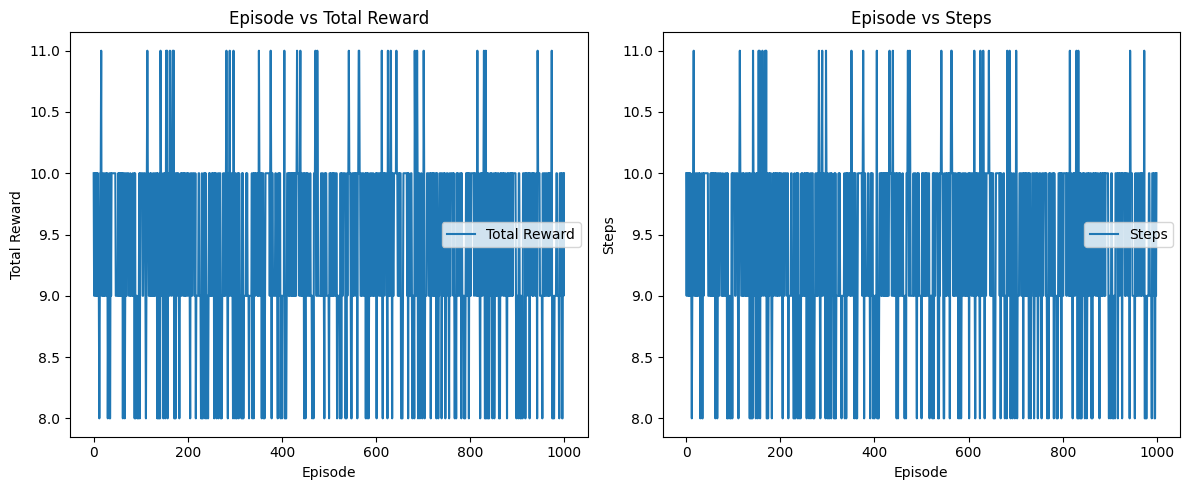

In [2]:
import gymnasium as gym
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import time
import matplotlib.pyplot as plt

# CartPole-v1 환경 사용
env = gym.make('CartPole-v1', render_mode='rgb_array')

def get_image_from_env(env):
    frame = env.render()
    return frame

def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # 흑백으로 변환
    image = cv2.resize(image, (64, 64))  # 크기 조정
    image = image.astype(np.float32) / 255.0  # 정규화
    image = np.expand_dims(image, axis=0)  # 배치 차원 추가
    return image

class CartPoleCNN(nn.Module):
    def __init__(self):
        super(CartPoleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=2)
        self.fc1 = nn.Linear(64*7*7, 256)
        self.fc2 = nn.Linear(256, 2)  # 이산적 동작 공간에서의 두 개의 동작

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
model = CartPoleCNN()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# 그래프를 그리기 위한 데이터 리스트
episode_rewards = []
episode_steps = []

start_time = time.time()

for episode in range(1000):
    state, _ = env.reset()
    total_reward = 0
    done = False
    step = 0
    
    while not done:
        image = get_image_from_env(env)
        image = preprocess_image(image)
        image = torch.FloatTensor(image).unsqueeze(0)
        
        # 이산적 동작 선택
        action_probs = model(image).detach().numpy().flatten()
        action = np.argmax(action_probs)
        
        next_state, reward, done, _, _ = env.step(action)
        
        # 손실 계산 및 역전파
        optimizer.zero_grad()
        output = model(image)
        target = output.clone()
        target[0][action] = reward + 0.99 * np.max(model(torch.FloatTensor(preprocess_image(get_image_from_env(env))).unsqueeze(0)).detach().numpy())
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        total_reward += reward
        step += 1
        
    # 각 에피소드마다 보상과 스텝 수 저장
    episode_rewards.append(total_reward)
    episode_steps.append(step)
    
    # 각 에피소드마다 실행 시간과 보상 출력
    elapsed_time = time.time() - start_time
    print(f"Episode {episode}, Total Reward: {total_reward}, Steps: {step}, Elapsed Time: {elapsed_time:.2f} seconds")

env.close()

# 결과 그래프 출력
plt.figure(figsize=(12, 5))

# 보상 그래프
plt.subplot(1, 2, 1)
plt.plot(episode_rewards, label='Total Reward')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode vs Total Reward')
plt.legend()

# 스텝 수 그래프
plt.subplot(1, 2, 2)
plt.plot(episode_steps, label='Steps')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.title('Episode vs Steps')
plt.legend()

plt.tight_layout()
plt.show()
